### Conditional Dual-AE
CoDAE trained to reconstruct the *mask images*.

In [1]:
import os
import numpy as np
import tensorflow as tf

from tensorflow_addons.optimizers import AdamW

In [2]:
os.environ['TF_GPU_THREAD_MODE'] = 'gpu_private'

In [3]:
import ad

from ad import utils
from ad.models import CoDAE

In [4]:
utils.set_random_seed(42)
ad.plot.set_style(default_cmap=ad.plot.CMAP2)

Random seed 42 set.


In [5]:
%load_ext autoreload
%autoreload 2

Data

In [6]:
train = utils.read_npz(folder='data/n_tracks/train', dtype=np.float32,
                       keep='qcd', verbose=False,
                       shuffle=True, keys=['images', 'labels', 'masses'])
utils.free_mem()

# mask image
train['trk_mask'] = (train['images'][..., 0, np.newaxis] > 0.0).astype(np.float32)

Model definition

In [7]:
model = CoDAE(image_shape=(72, 58, 1), latent_size=64,
              encoder1=dict(depths=(1, 1, 1, 1), filters=[64, 128, 128, 256],
                            groups=4, kernel_initializer='he_uniform'),
              encoder2=dict(filters=[64, 128, 128, 256], groups=2,
                            kernel_initializer='he_uniform'),
              decoder=dict(filters=[256, 128, 128, 64], depths=(1, 1, 1, 1),
                           bias=-1.0, groups=4, kernel_initializer='he_uniform'))
model.summary()

Model: "Res-Encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 72, 58, 1)]  0           []                               
                                                                                                  
 dconv-b0 (ConvLayer)           (None, 36, 29, 64)   768         ['image[0][0]']                  
                                                                                                  
 conv1-b0_0 (ConvLayer)         (None, 36, 29, 64)   9408        ['dconv-b0[0][0]']               
                                                                                                  
 conv2-b0_0 (ConvLayer)         (None, 36, 29, 64)   9408        ['conv1-b0_0[0][0]']             
                                                                                        

In [9]:
model.compile(optimizer=AdamW(weight_decay=1e-4, clipnorm=1.0),
              loss=CoDAE.bce_loss)

checkpoint = utils.get_checkpoint(path='codae', monitor='val_ssim',
                                  mode='max', best_only=True)

plot = ad.callbacks.PlotCallback(path=None, data=train['trk_mask'], amount=5, freq=5,
                                 cmap=ad.plot.CMAP3, v_max=1.0)

Epoch 1/30
267/267 [==============================] - ETA: 0s - loss: 375.9684 - mse: 179.3099 - psnr: 16.3836 - ssim: 0.3284 - true_energy: 81.2595 - pred_energy: 289.8443 - grads_norm: 1568.6040 - weights_norm: 110.3725

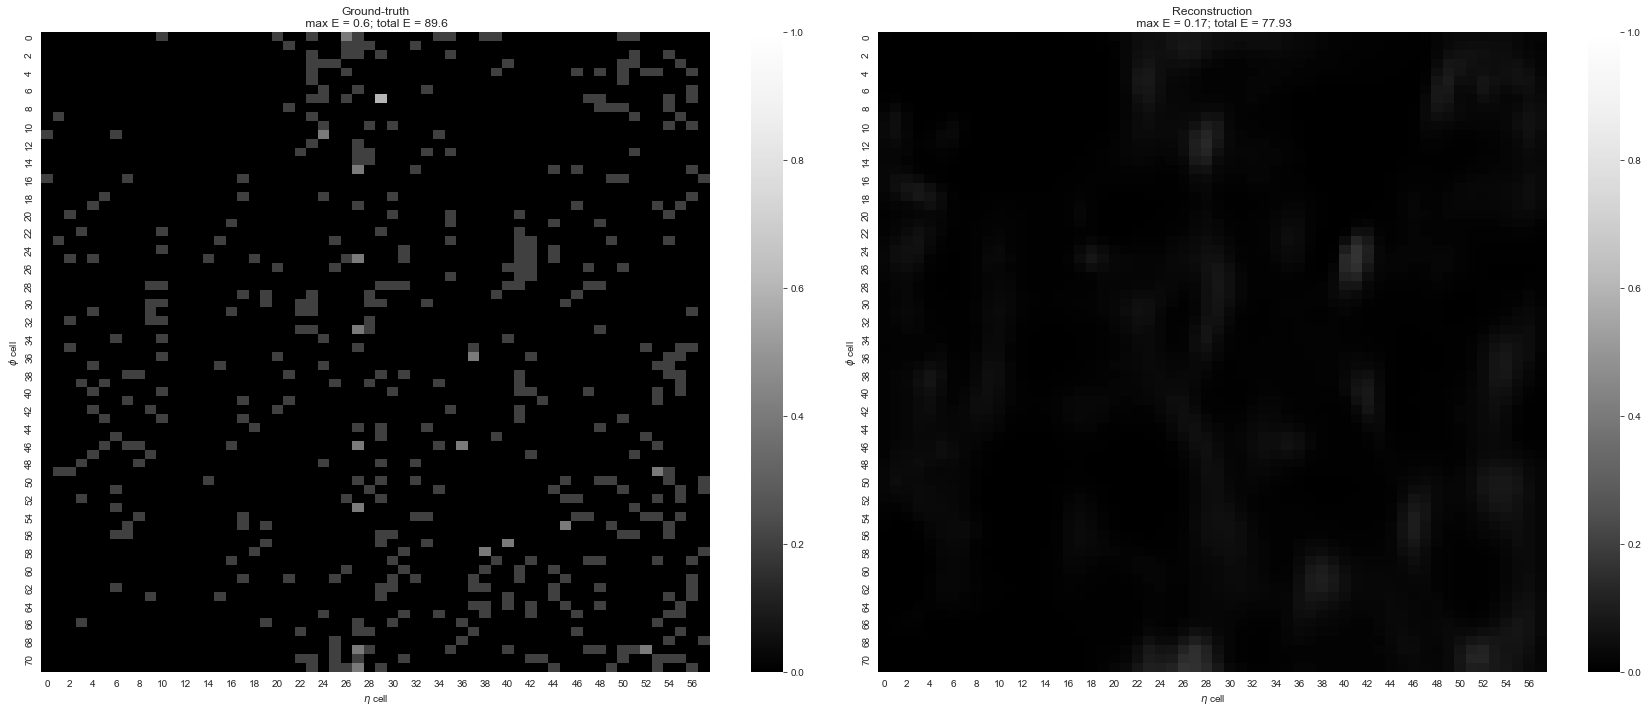

267/267 [==============================] - 232s 774ms/step - loss: 375.9684 - mse: 178.9907 - psnr: 16.3880 - ssim: 0.3288 - true_energy: 81.2586 - pred_energy: 289.2347 - grads_norm: 1564.3931 - weights_norm: 110.3711 - val_loss: 356.8001 - val_mse: 89.0482 - val_psnr: 17.6533 - val_ssim: 0.4496 - val_true_energy: 81.1814 - val_pred_energy: 116.0909
Epoch 2/30
267/267 [==============================] - 197s 736ms/step - loss: 306.8719 - mse: 83.1296 - psnr: 17.8163 - ssim: 0.4802 - true_energy: 81.1295 - pred_energy: 106.8759 - grads_norm: 353.9229 - weights_norm: 109.5622 - val_loss: 298.1831 - val_mse: 76.8057 - val_psnr: 18.0489 - val_ssim: 0.5228 - val_true_energy: 81.1814 - val_pred_energy: 98.8400
Epoch 3/30
267/267 [==============================] - 195s 732ms/step - loss: 270.1074 - mse: 73.8456 - psnr: 18.1928 - ssim: 0.5465 - true_energy: 81.1652 - pred_energy: 96.0183 - grads_norm: 325.4257 - weights_norm: 108.6239 - val_loss: 264.9596 - val_mse: 70.1384 - val_psnr: 18.3932

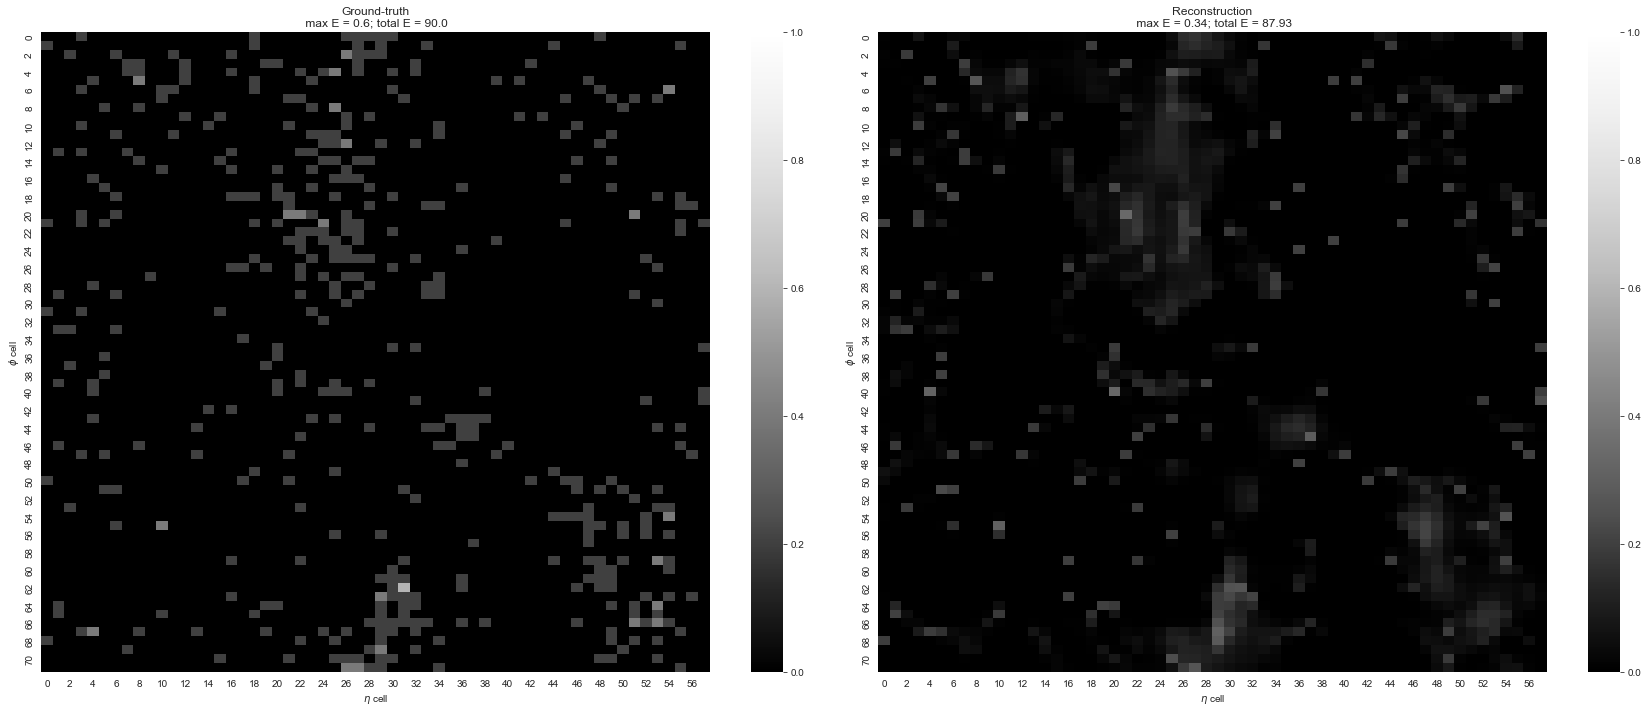

267/267 [==============================] - 199s 746ms/step - loss: 214.0659 - mse: 60.2520 - psnr: 19.0775 - ssim: 0.6633 - true_energy: 81.1694 - pred_energy: 88.3257 - grads_norm: 460.5249 - weights_norm: 105.5143 - val_loss: 211.6337 - val_mse: 58.4561 - val_psnr: 19.2240 - val_ssim: 0.6788 - val_true_energy: 81.1813 - val_pred_energy: 87.5622
Epoch 7/30
267/267 [==============================] - 198s 741ms/step - loss: 202.3832 - mse: 57.3485 - psnr: 19.3189 - ssim: 0.6881 - true_energy: 81.1736 - pred_energy: 87.1656 - grads_norm: 505.1494 - weights_norm: 104.4919 - val_loss: 200.4795 - val_mse: 55.8345 - val_psnr: 19.4503 - val_ssim: 0.7008 - val_true_energy: 81.1813 - val_pred_energy: 86.3838
Epoch 8/30
267/267 [==============================] - 198s 742ms/step - loss: 192.6327 - mse: 54.8786 - psnr: 19.5372 - ssim: 0.7087 - true_energy: 81.1744 - pred_energy: 86.0979 - grads_norm: 545.0647 - weights_norm: 103.4899 - val_loss: 190.9127 - val_mse: 53.5352 - val_psnr: 19.6613 - va

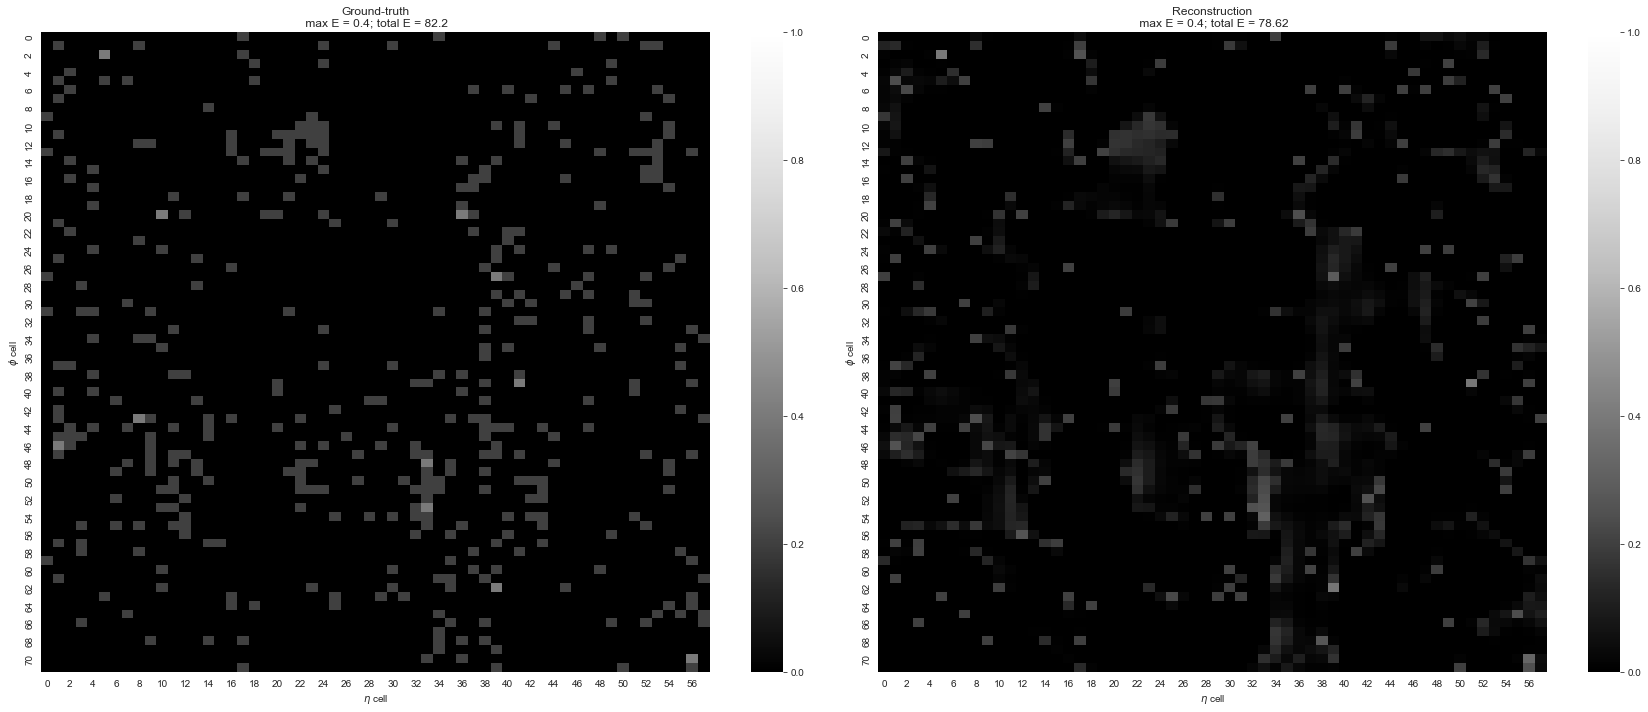

267/267 [==============================] - 200s 748ms/step - loss: 169.9010 - mse: 48.9921 - psnr: 20.1223 - ssim: 0.7551 - true_energy: 81.1778 - pred_energy: 84.7745 - grads_norm: 635.9643 - weights_norm: 100.6406 - val_loss: 168.7354 - val_mse: 48.0278 - val_psnr: 20.2265 - val_ssim: 0.7624 - val_true_energy: 81.1814 - val_pred_energy: 84.5434
Epoch 12/30
267/267 [==============================] - 201s 752ms/step - loss: 163.8604 - mse: 47.3925 - psnr: 20.2980 - ssim: 0.7671 - true_energy: 81.1708 - pred_energy: 84.4194 - grads_norm: 655.4911 - weights_norm: 99.7467 - val_loss: 162.8158 - val_mse: 46.5165 - val_psnr: 20.3957 - val_ssim: 0.7736 - val_true_energy: 81.1813 - val_pred_energy: 84.3018
Epoch 13/30
267/267 [==============================] - 203s 760ms/step - loss: 158.4196 - mse: 45.9380 - psnr: 20.4631 - ssim: 0.7778 - true_energy: 81.1743 - pred_energy: 84.1947 - grads_norm: 676.7165 - weights_norm: 98.8840 - val_loss: 157.4494 - val_mse: 45.1311 - val_psnr: 20.5573 - va

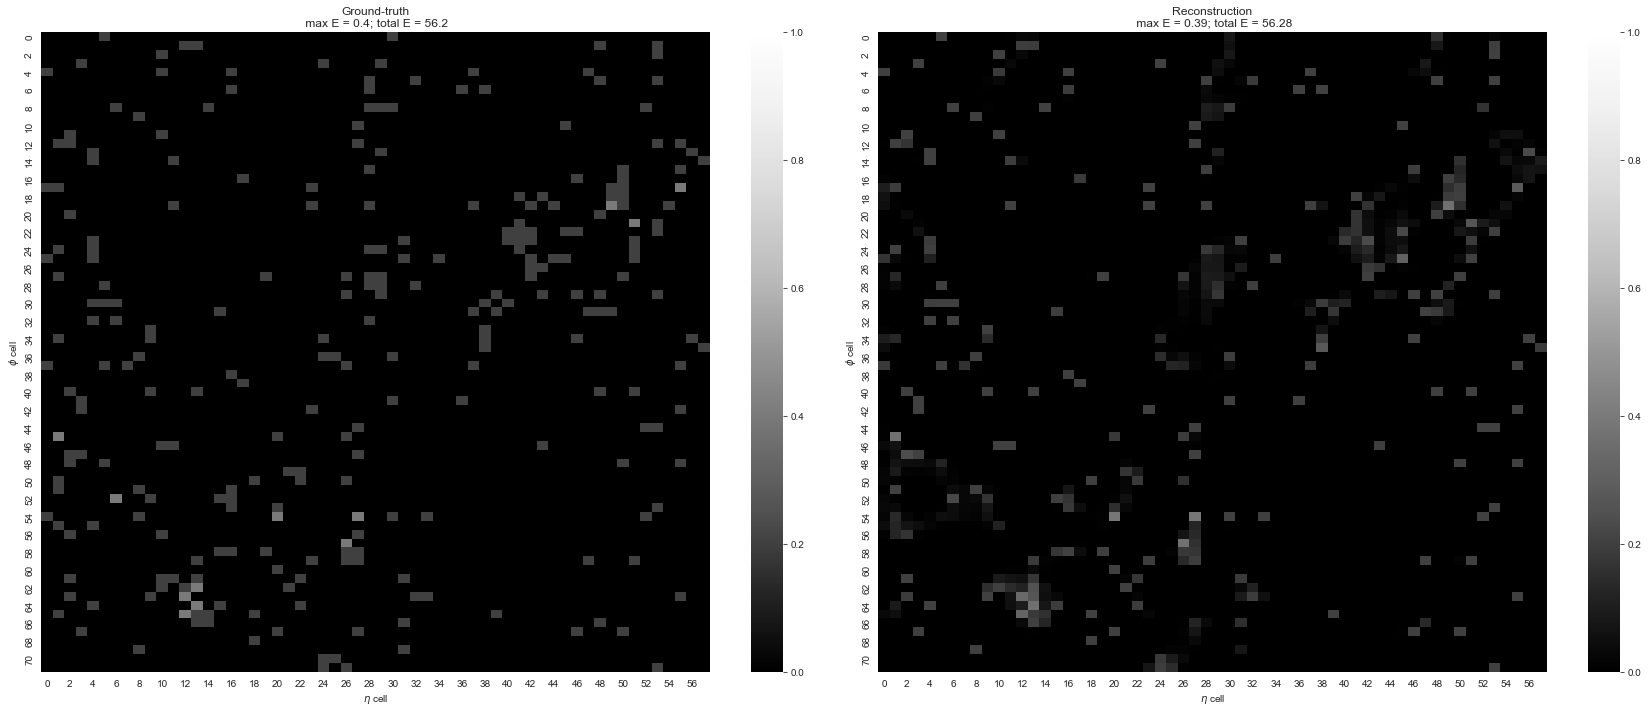

267/267 [==============================] - 207s 777ms/step - loss: 144.6239 - mse: 42.2084 - psnr: 20.9208 - ssim: 0.8039 - true_energy: 81.1737 - pred_energy: 83.5586 - grads_norm: 718.3592 - weights_norm: 96.4884 - val_loss: 143.8631 - val_mse: 41.5605 - val_psnr: 21.0054 - val_ssim: 0.8083 - val_true_energy: 81.1814 - val_pred_energy: 83.4677
Epoch 17/30
267/267 [==============================] - 208s 778ms/step - loss: 140.6582 - mse: 41.1271 - psnr: 21.0639 - ssim: 0.8112 - true_energy: 81.1827 - pred_energy: 83.4142 - grads_norm: 727.9664 - weights_norm: 95.7540 - val_loss: 139.9134 - val_mse: 40.5054 - val_psnr: 21.1482 - val_ssim: 0.8153 - val_true_energy: 81.1814 - val_pred_energy: 83.3726
Epoch 18/30
267/267 [==============================] - 199s 747ms/step - loss: 136.9509 - mse: 40.1036 - psnr: 21.2039 - ssim: 0.8179 - true_energy: 81.1807 - pred_energy: 83.3238 - grads_norm: 736.6154 - weights_norm: 95.0503 - val_loss: 136.2805 - val_mse: 39.5304 - val_psnr: 21.2838 - val

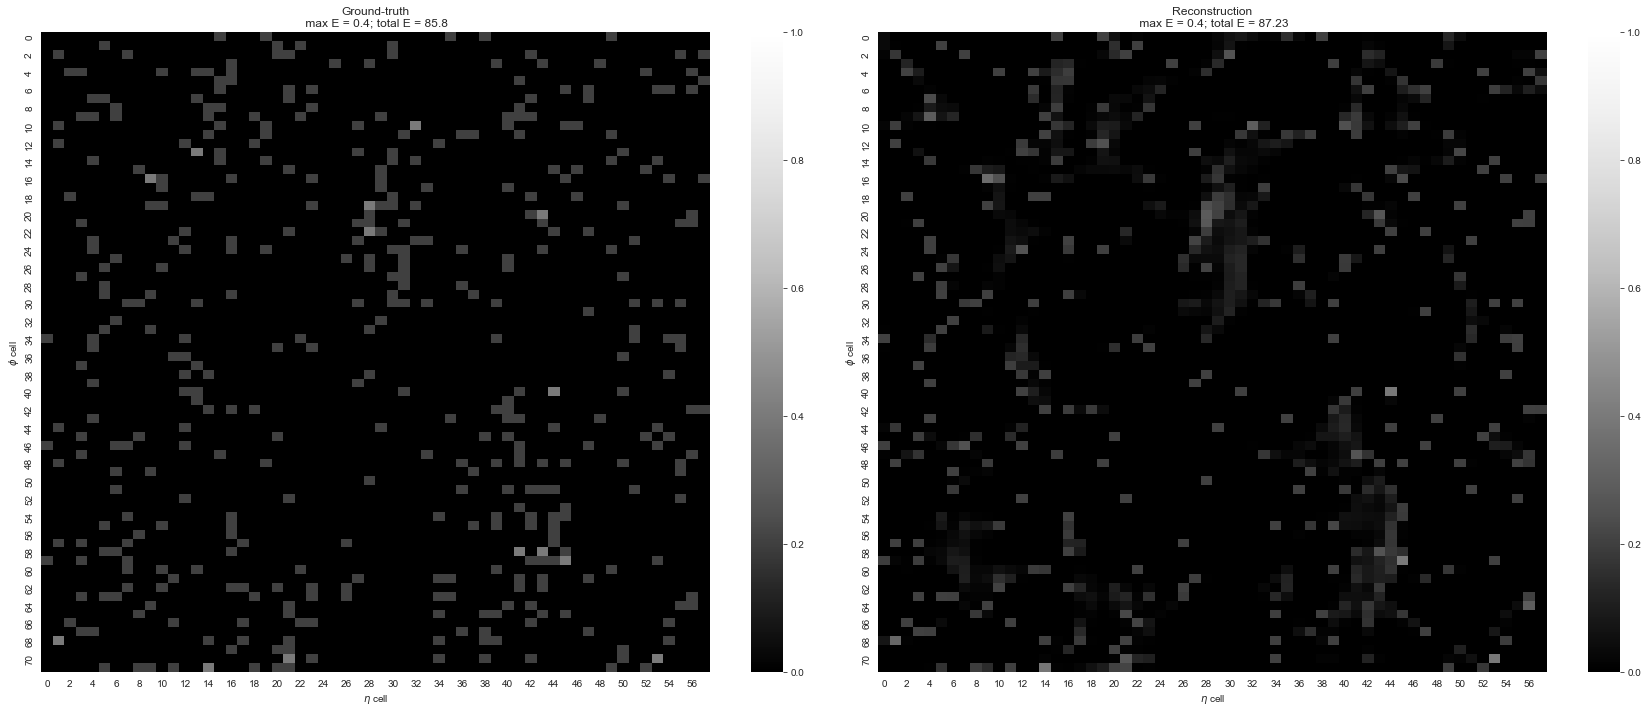

267/267 [==============================] - 203s 762ms/step - loss: 127.2429 - mse: 37.4125 - psnr: 21.5948 - ssim: 0.8351 - true_energy: 81.1804 - pred_energy: 82.9856 - grads_norm: 751.0574 - weights_norm: 93.1258 - val_loss: 126.7033 - val_mse: 36.9306 - val_psnr: 21.6680 - val_ssim: 0.8381 - val_true_energy: 81.1815 - val_pred_energy: 82.9279
Epoch 22/30
267/267 [==============================] - 197s 738ms/step - loss: 124.3633 - mse: 36.6043 - psnr: 21.7200 - ssim: 0.8401 - true_energy: 81.1787 - pred_energy: 82.8935 - grads_norm: 754.1013 - weights_norm: 92.5419 - val_loss: 123.7986 - val_mse: 36.1318 - val_psnr: 21.7952 - val_ssim: 0.8430 - val_true_energy: 81.1815 - val_pred_energy: 82.8878
Epoch 23/30
267/267 [==============================] - 201s 752ms/step - loss: 121.5707 - mse: 35.8207 - psnr: 21.8460 - ssim: 0.8449 - true_energy: 81.1819 - pred_energy: 82.8581 - grads_norm: 755.9493 - weights_norm: 91.9875 - val_loss: 121.0933 - val_mse: 35.3854 - val_psnr: 21.9159 - val

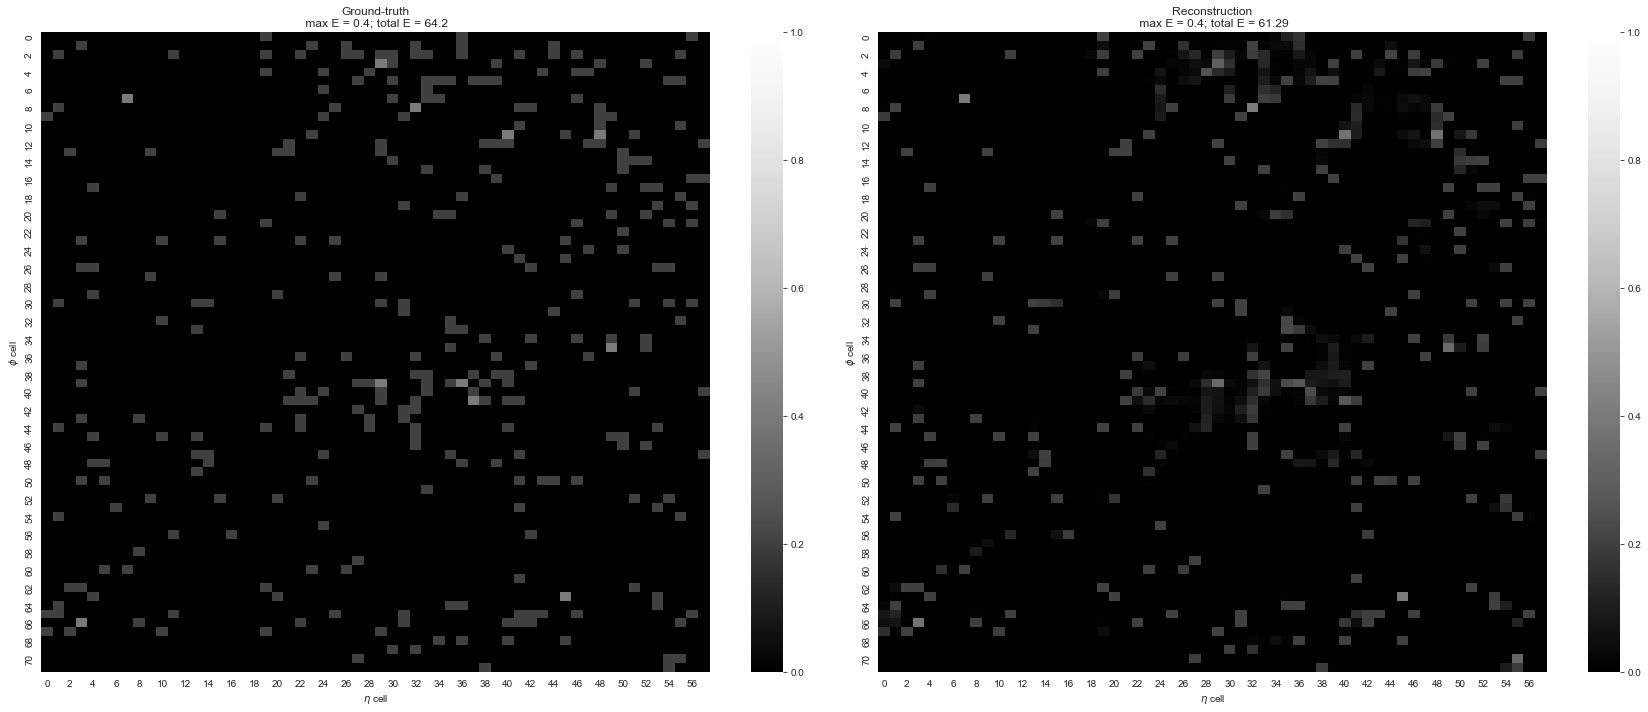

267/267 [==============================] - 204s 764ms/step - loss: 114.1309 - mse: 33.7173 - psnr: 22.2004 - ssim: 0.8572 - true_energy: 81.1819 - pred_energy: 82.6296 - grads_norm: 756.3181 - weights_norm: 90.5064 - val_loss: 113.7008 - val_mse: 33.3256 - val_psnr: 22.2705 - val_ssim: 0.8595 - val_true_energy: 81.1815 - val_pred_energy: 82.5695
Epoch 27/30
267/267 [==============================] - 194s 726ms/step - loss: 111.8445 - mse: 33.0618 - psnr: 22.3193 - ssim: 0.8610 - true_energy: 81.1797 - pred_energy: 82.5457 - grads_norm: 754.2291 - weights_norm: 90.0744 - val_loss: 111.4470 - val_mse: 32.6931 - val_psnr: 22.3847 - val_ssim: 0.8630 - val_true_energy: 81.1815 - val_pred_energy: 82.5475
Epoch 28/30
267/267 [==============================] - 194s 727ms/step - loss: 109.6678 - mse: 32.4397 - psnr: 22.4324 - ssim: 0.8645 - true_energy: 81.1797 - pred_energy: 82.5267 - grads_norm: 752.3067 - weights_norm: 89.6746 - val_loss: 109.2771 - val_mse: 32.0812 - val_psnr: 22.4998 - val

In [10]:
h = model.fit(x=train['trk_mask'], epochs=30, validation_split=0.25,
              verbose=1, batch_size=128, callbacks=[plot, checkpoint])

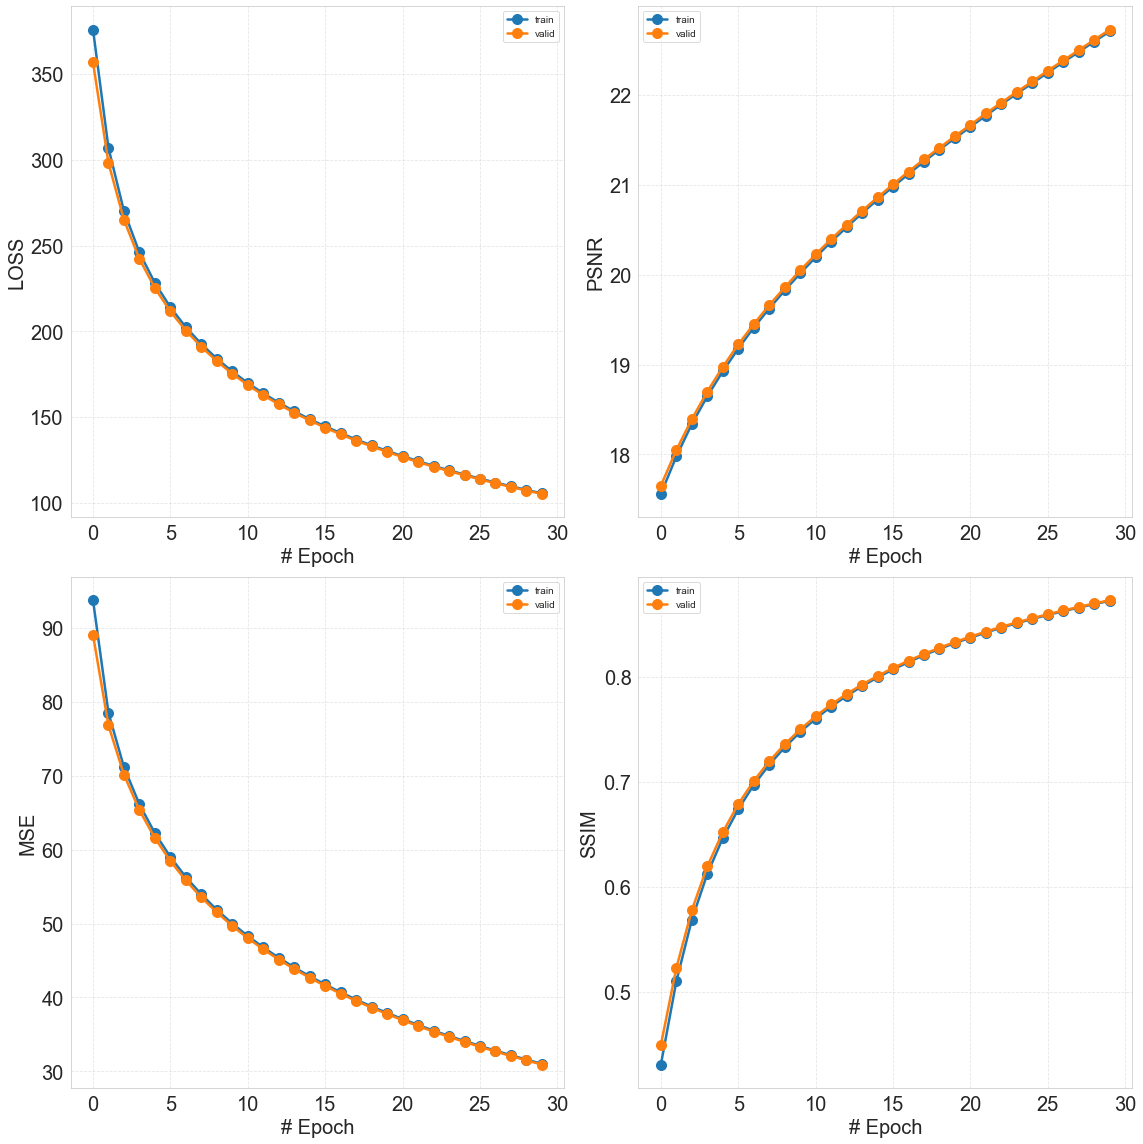

In [11]:
ad.plot.history(h, keys=['loss', 'psnr', 'mse', 'ssim'])

Evaluation

In [8]:
utils.load_from_checkpoint(model, path='codae', mode='max')

Loaded from "weights\codae\weights-30-0.873"


In [9]:
x_test = utils.read_npz(folder=os.path.join('data/n_tracks', 'test'),
                        dtype=np.float32, verbose=False,
                        keys=['images', 'labels', 'masses'])

y_test = x_test['labels']
m_test = x_test['masses']
x_test = x_test['images']
x_mask = (x_test > 0.0)[..., 0, np.newaxis].astype(np.float32)

del x_test
utils.free_mem()

1804

QCD
#170152
5318/5318 [==============================] - 215s 39ms/step


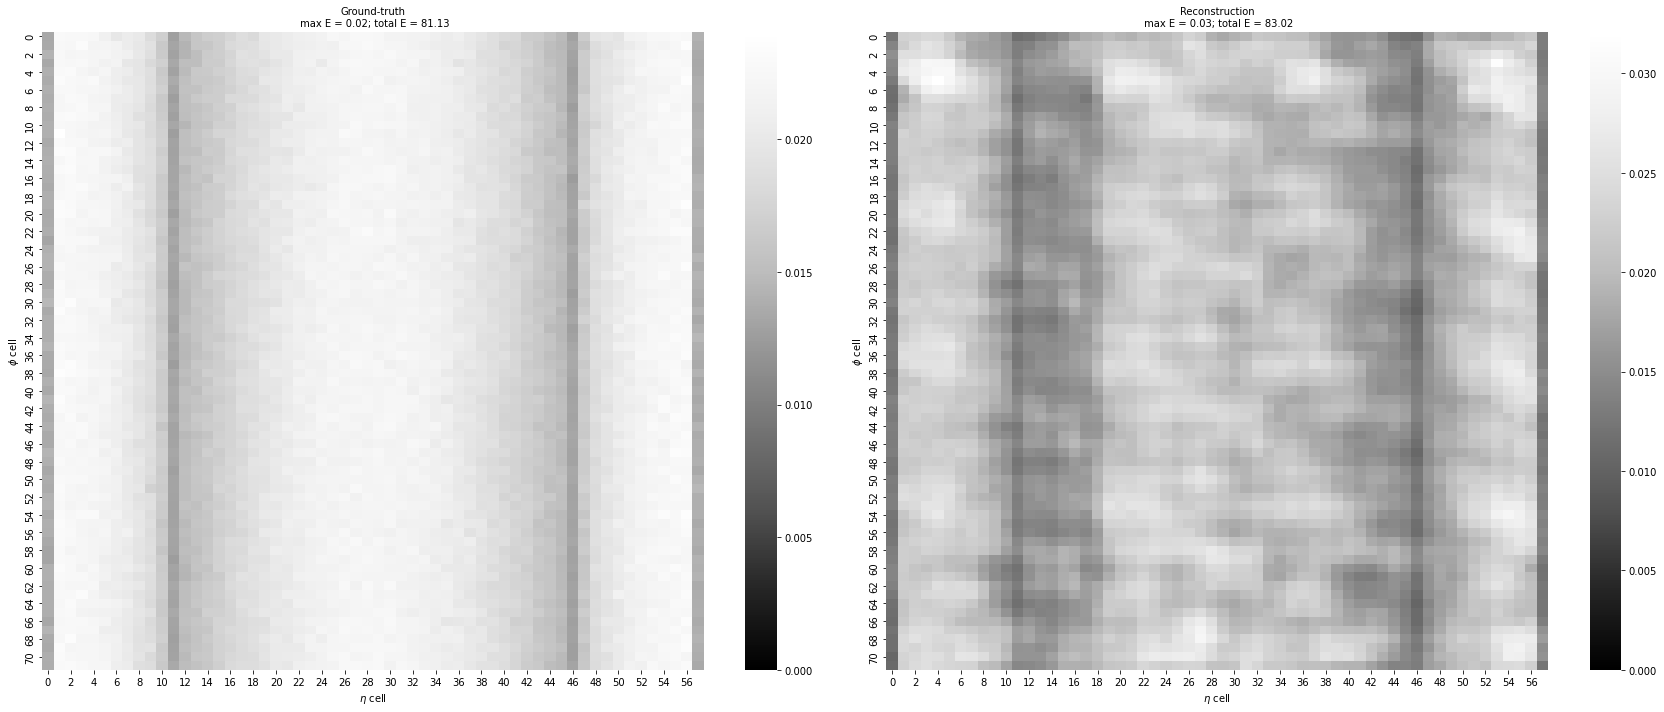

SUEP (125)
#4124
129/129 [==============================] - 6s 45ms/step


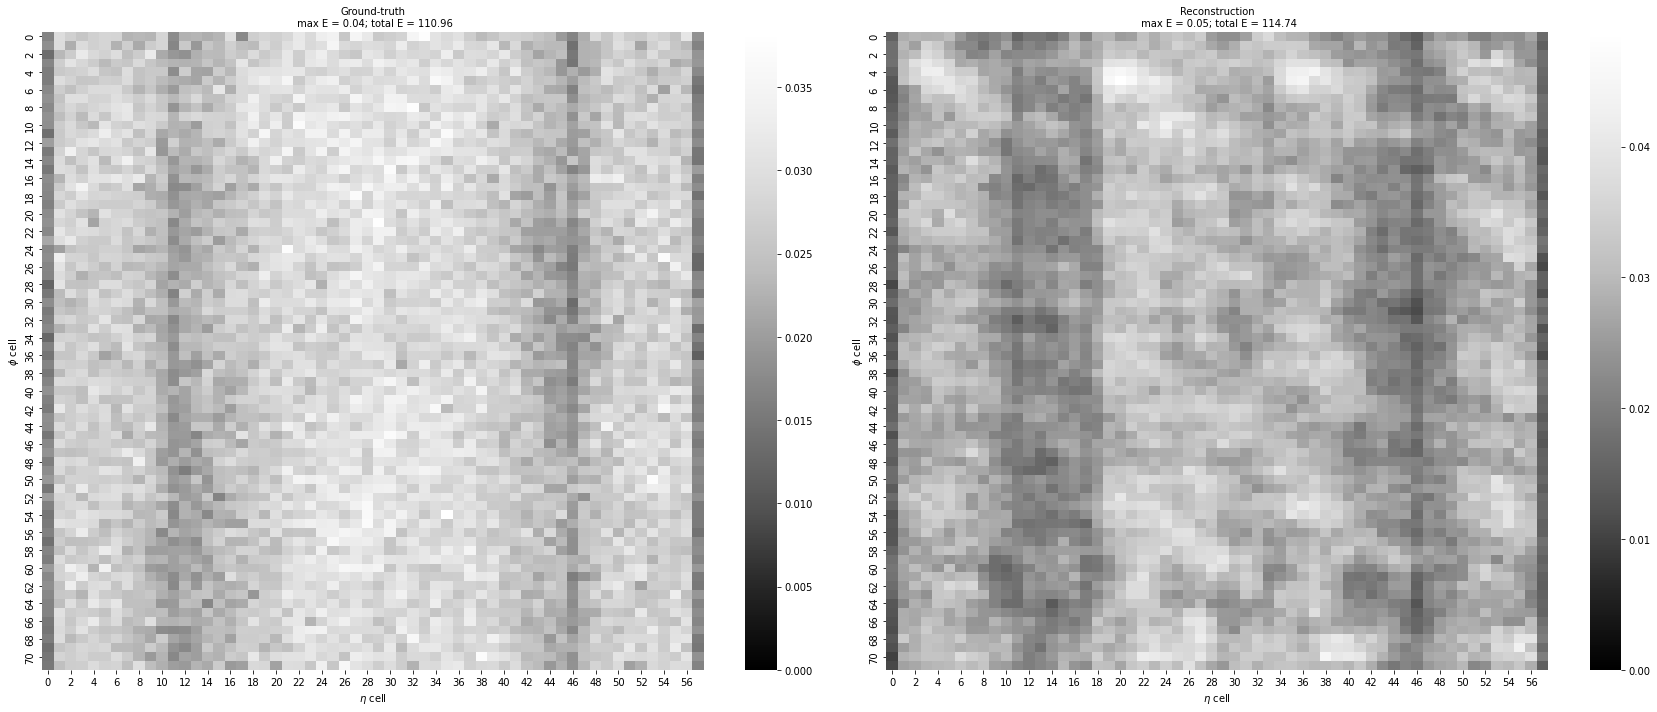

SUEP (200)
#3994
125/125 [==============================] - 6s 45ms/step


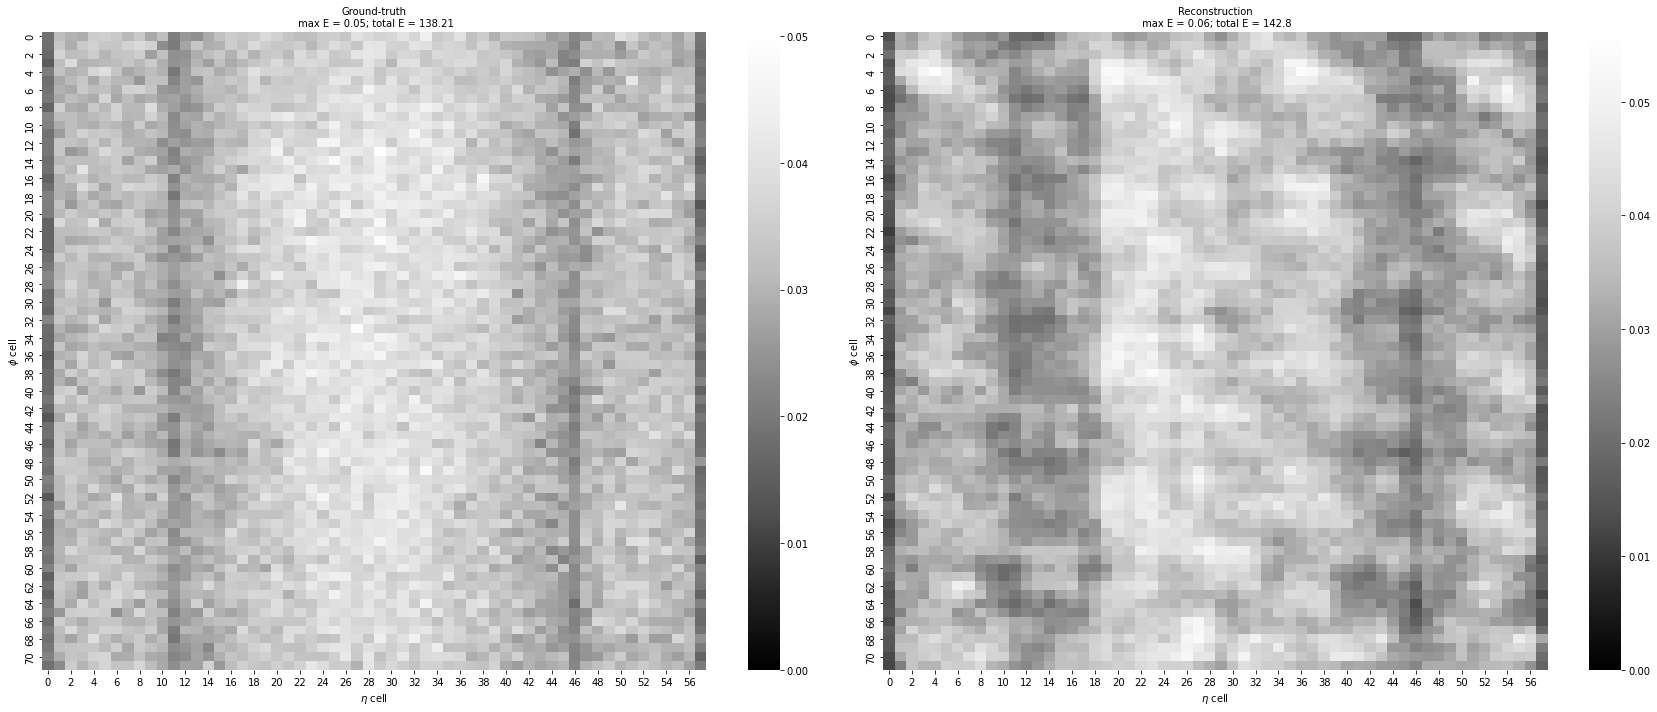

SUEP (300)
#7095
222/222 [==============================] - 9s 42ms/step


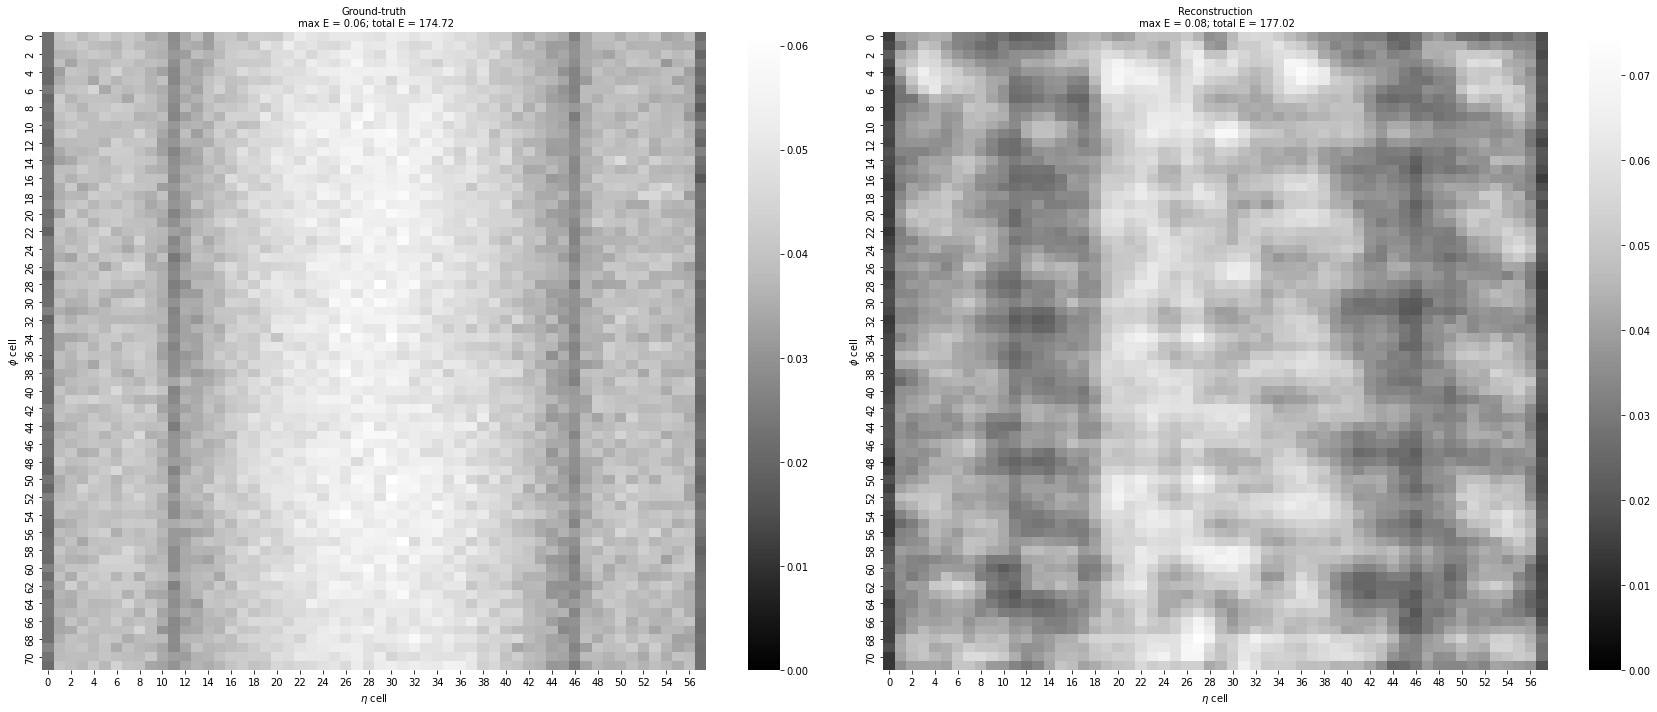

SUEP (400)
#10173
318/318 [==============================] - 13s 41ms/step


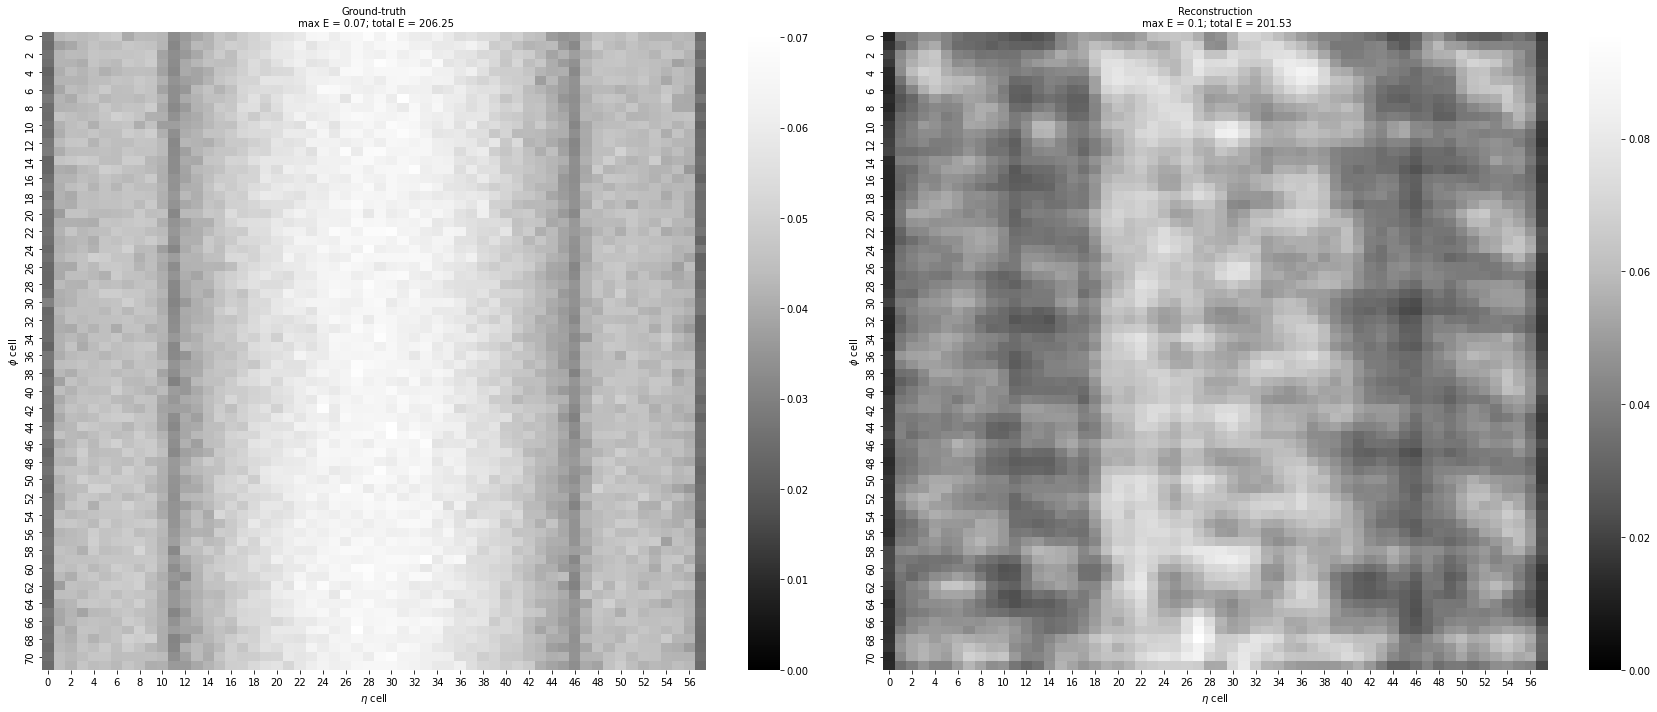

SUEP (700)
#18605
582/582 [==============================] - 23s 40ms/step


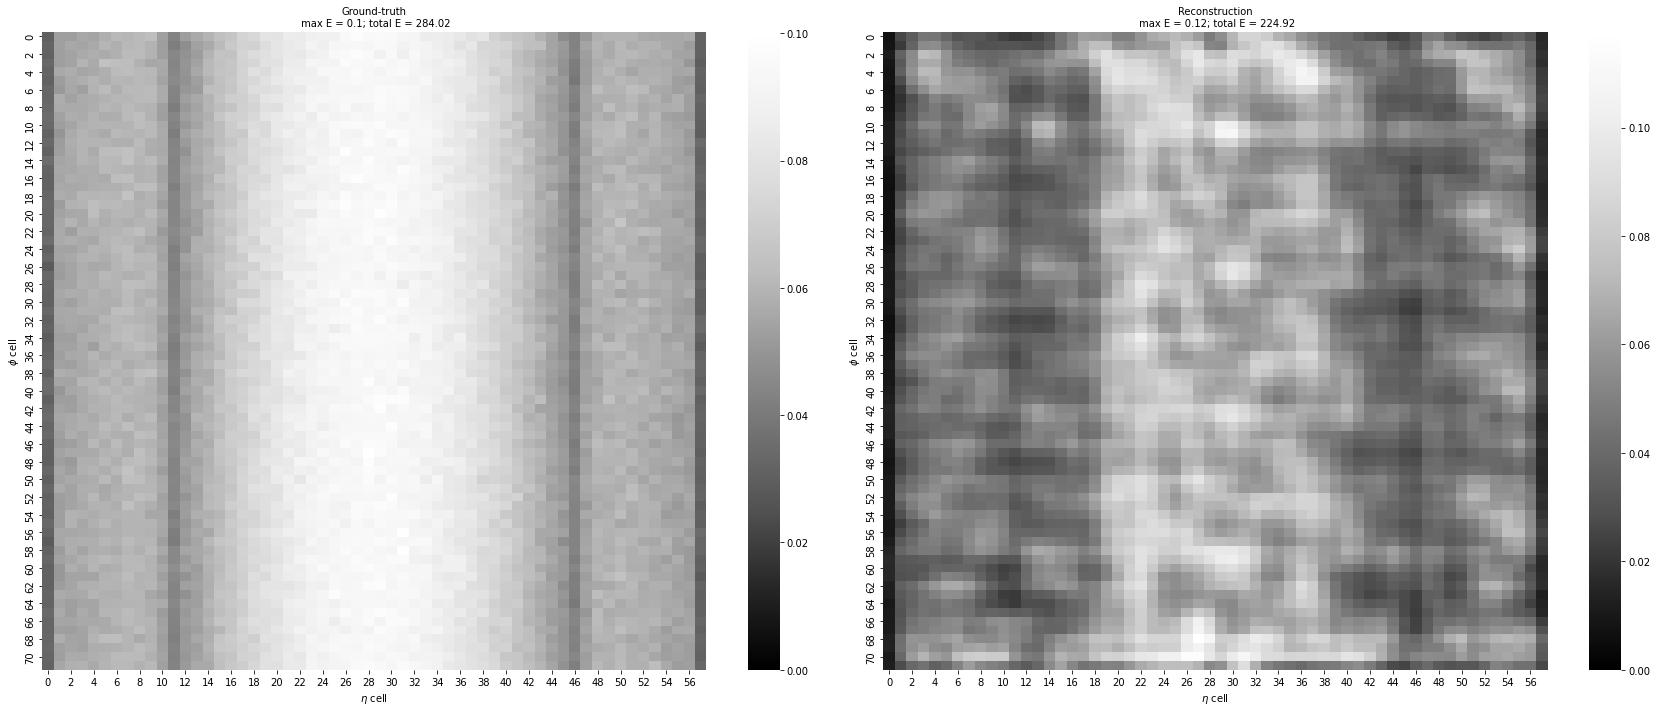

SUEP (1000)
#23151
724/724 [==============================] - 29s 39ms/step


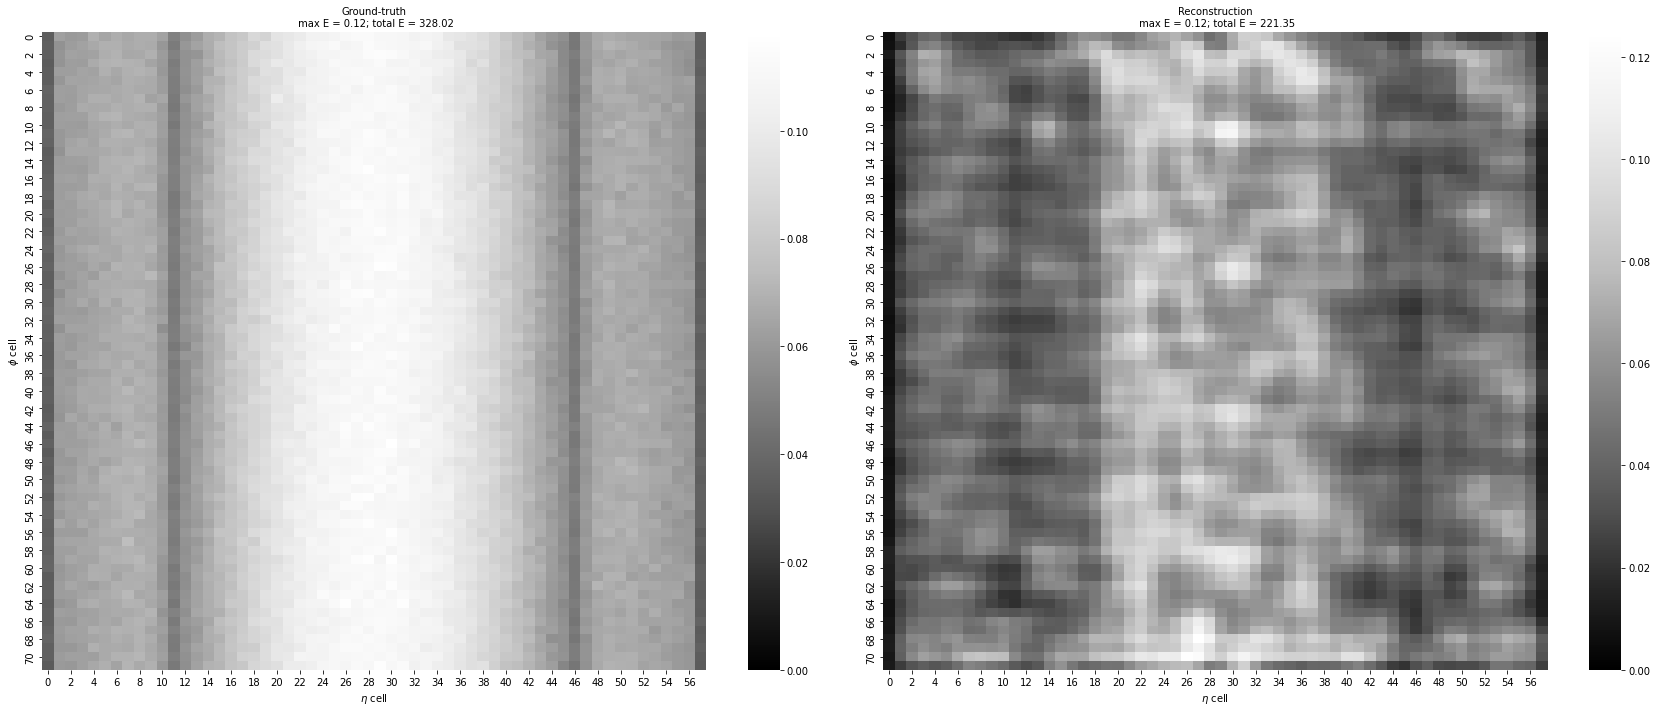

SVJ (2.1)
#27517
860/860 [==============================] - 34s 39ms/step


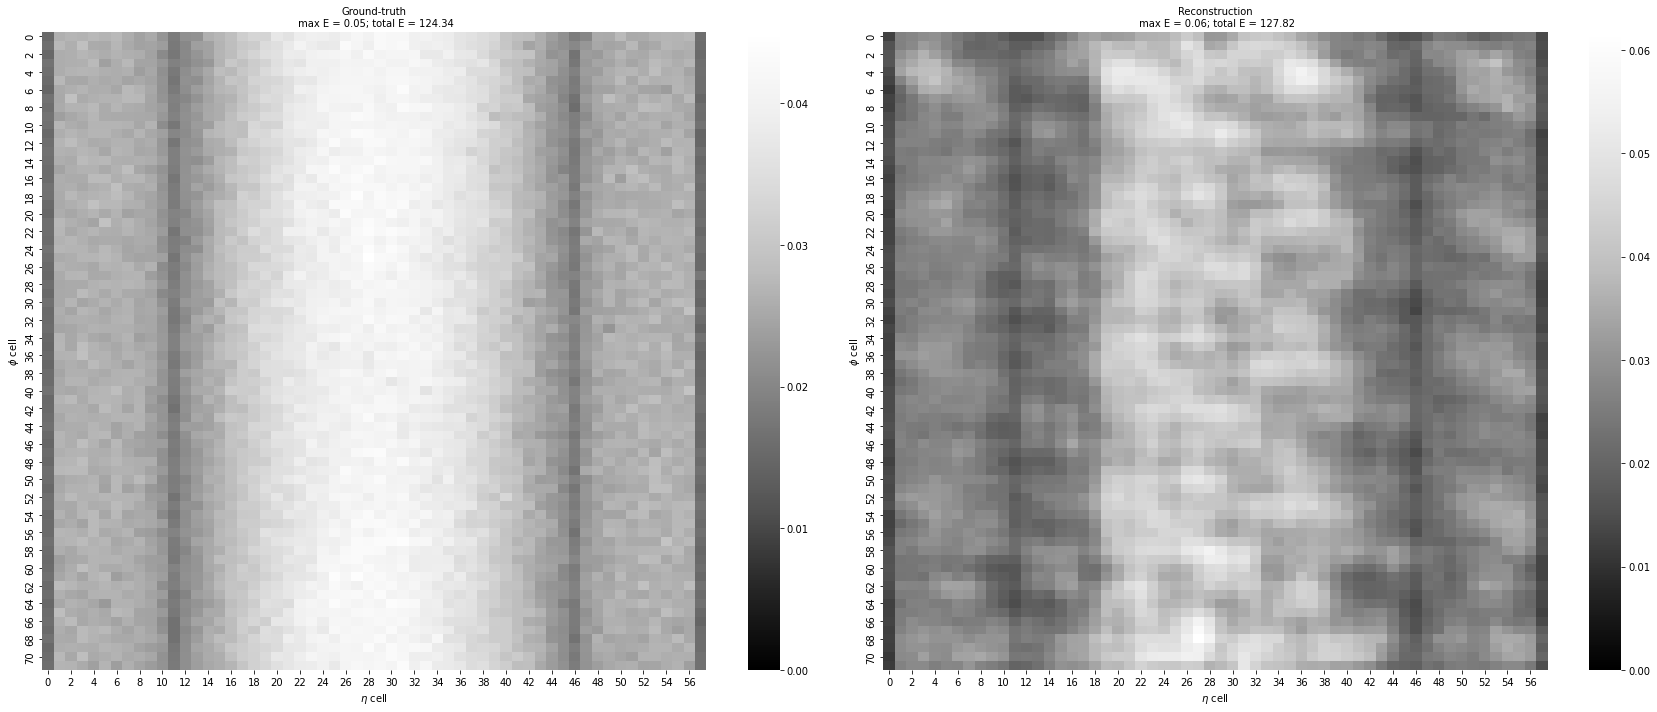

SVJ (3.1)
#40315
1260/1260 [==============================] - 49s 39ms/step


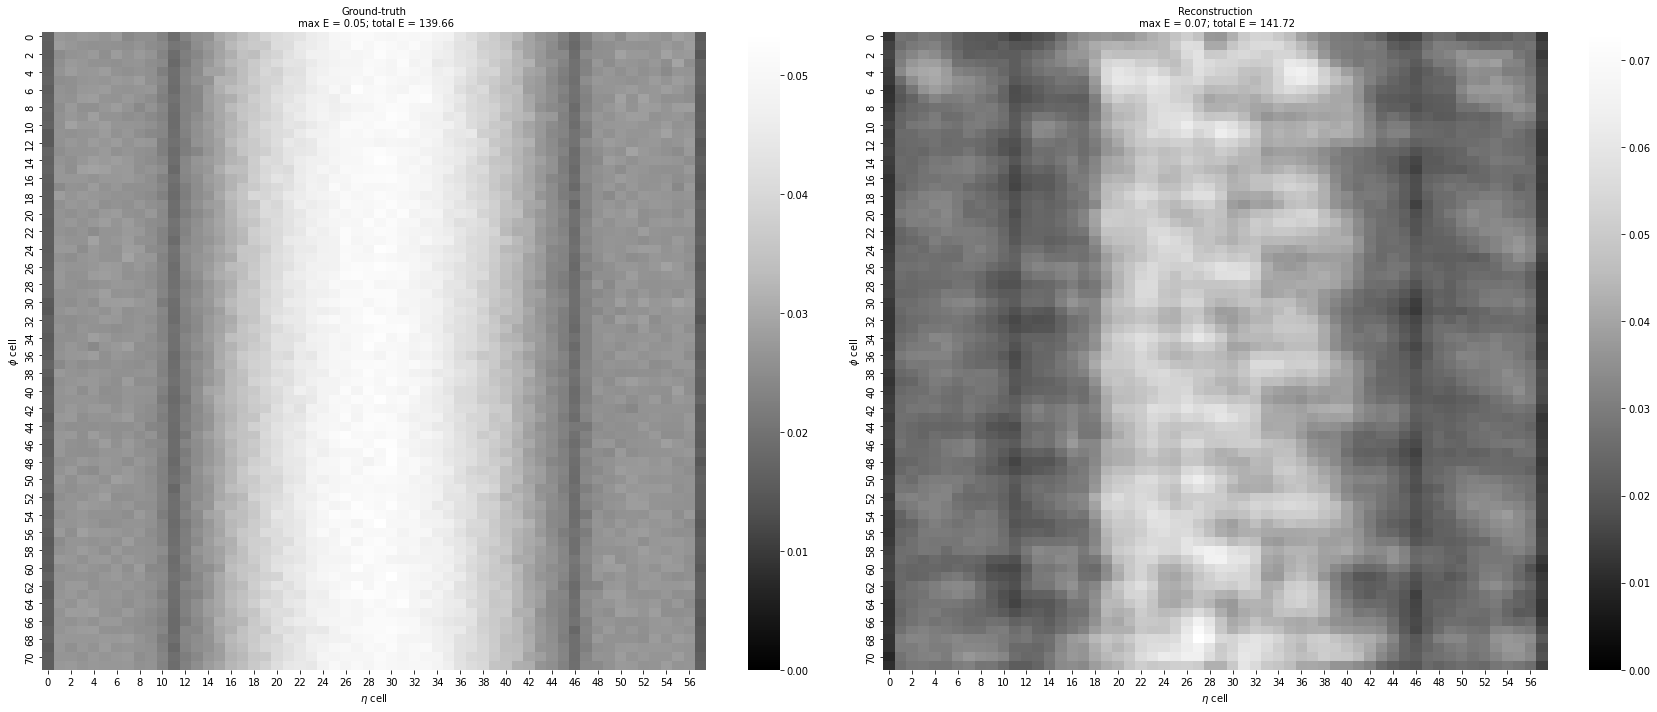

SVJ (4.1)
#38643
1208/1208 [==============================] - 48s 40ms/step


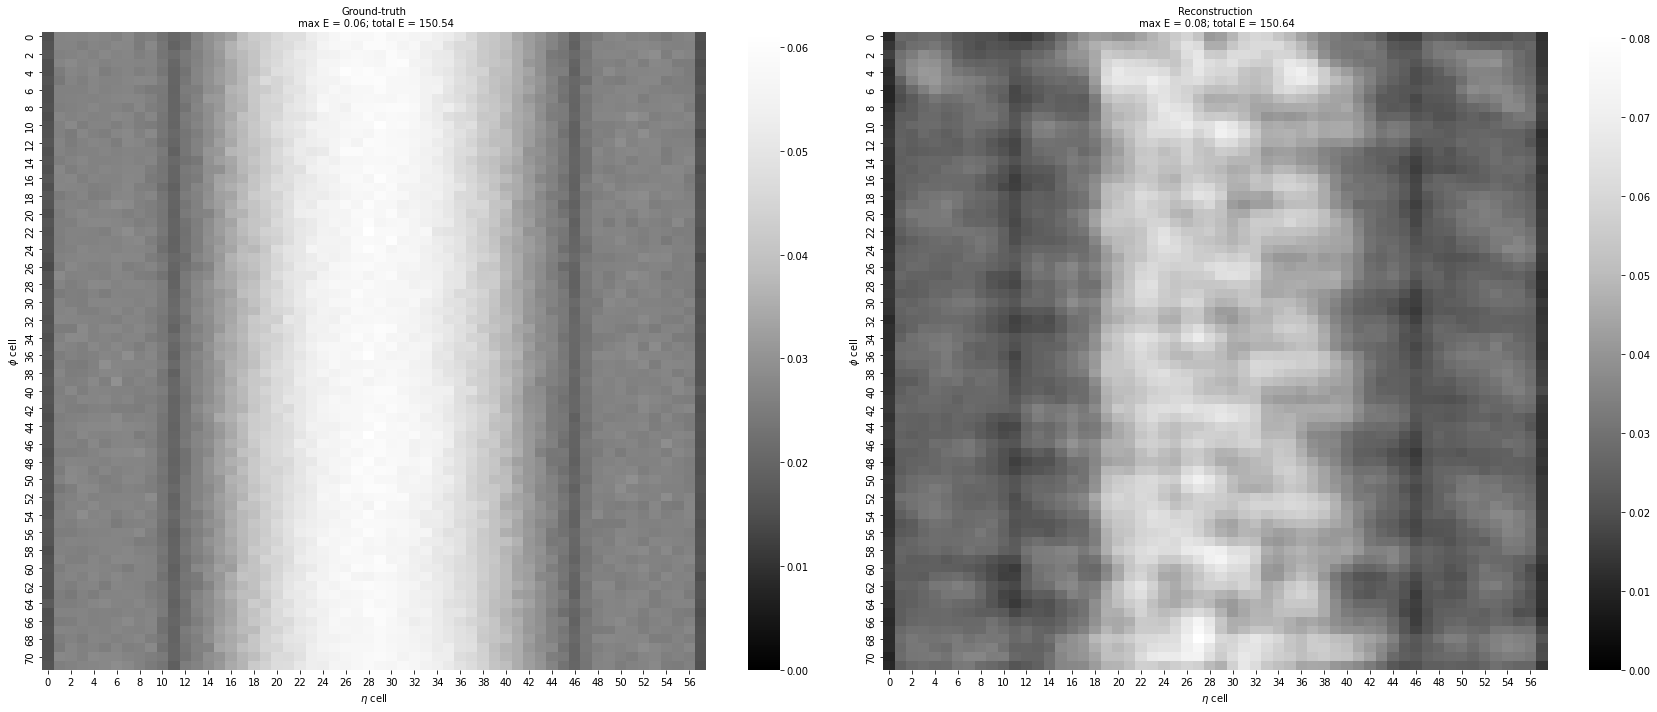

In [10]:
ad.eval2.average_predictions(model, x=x_mask, y=y_test, m=m_test, cmap=ad.plot.CMAP3,
                             verbose=1)

Auxiliary latent space

In [10]:
z = model.encoder2.predict(x_mask, batch_size=256)
z_l2 = tf.math.l2_normalize(z, axis=-1).numpy()

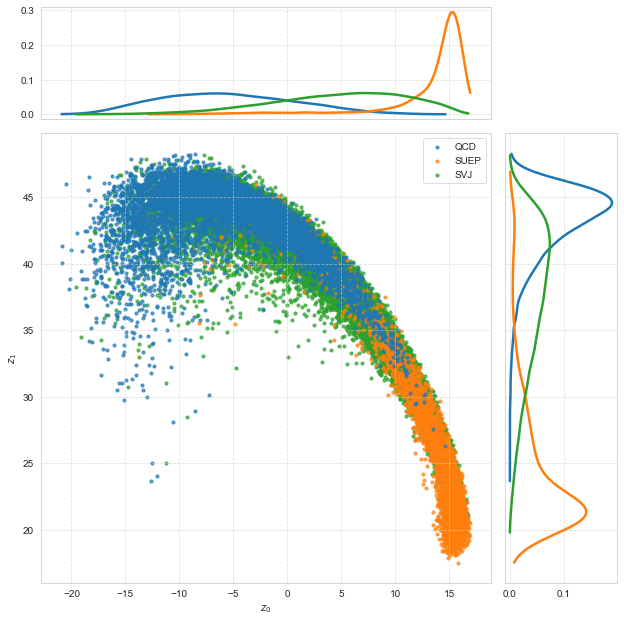

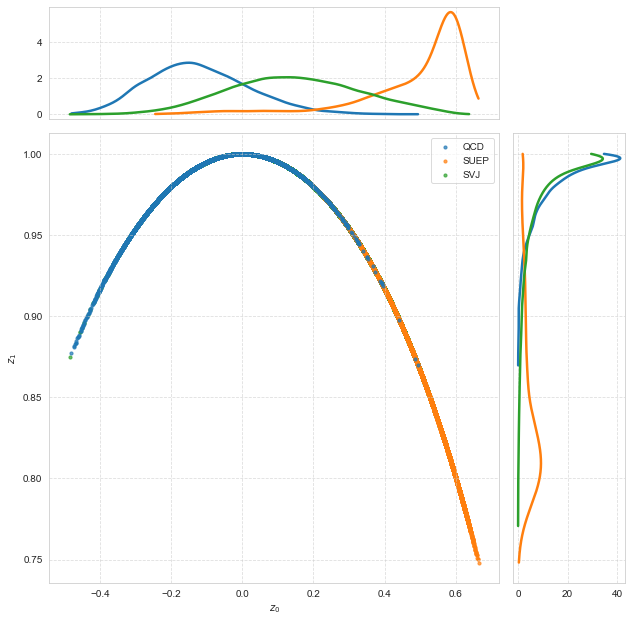

In [16]:
ad.plot.latent_kde(z, y=y_test)
ad.plot.latent_kde(z_l2, y=y_test)